# Analyzing results of one experiment.
### Finding std of std and mean
### plotting the predictions
### plotting kde
### KS test

### exchange rate has 

8 train series

40 test series = 5 * 40

the prediction length is 30 business days

## imports

In [2]:
# Third-party imports
%matplotlib inline
import json
import matplotlib.pyplot as plt


In [3]:
from src.RQ1_forecast import *

In [4]:
num_samples = 100

In [5]:
data_address1 = '/home/dev/deepts/experiments/deep_ar/exchange_rate/1B'

# Forecast section

## Load data

In [6]:
# read the forcast file
forcast_list1 = read_csv_result('forecasts.csv', data_address1)

201it [00:00, 35324.52it/s]
100%|###########| 100/100 [00:02<00:00, 41.43it/s]


In [7]:
len(forcast_list1)

100

In [8]:
forcast_list1[0]

,fold_num,series_number,timestamp,target,sample0,sample1,sample2,sample3,sample4,sample5,...,sample90,sample91,sample92,sample93,sample94,sample95,sample96,sample97,sample98,sample99
0,1,0,2013-04-09,1.026905,1.025171,1.039257,1.037230,1.029608,1.028275,1.017177,...,1.019783,1.030707,1.026292,1.009981,1.039965,1.019800,1.044668,1.037569,1.011429,1.035184
1,1,0,2013-04-10,1.037344,1.006547,1.044947,1.029132,1.022672,1.036988,1.030464,...,1.004740,1.049393,1.041196,1.004498,1.007378,1.024339,1.039940,1.021641,1.028899,1.042660
2,1,0,2013-04-11,1.038875,1.025143,1.035316,1.034181,1.036491,1.067537,1.046421,...,1.024175,1.052618,1.006988,1.036126,1.028787,1.021328,1.025250,1.035778,1.008959,1.040404
3,1,0,2013-04-12,1.032855,1.050745,1.033395,1.035817,1.043009,1.057658,1.052287,...,1.048930,1.063157,1.092610,1.022651,0.980986,1.034698,1.055833,1.042171,1.044937,1.036349
4,1,0,2013-04-15,1.033293,1.006799,1.044994,1.035633,1.038486,1.046358,1.031570,...,1.033950,1.071664,1.038465,1.029708,1.026947,1.037843,1.030475,1.032818,1.011194,1.053730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,1,39,2013-10-29,0.800320,0.821680,0.835914,0.849038,0.815174,0.821888,0.870079,...,0.813041,0.842194,0.846438,0.806438,0.833015,0.844504,0.838179,0.856526,0.858620,0.833294
1196,1,39,2013-10-30,0.800897,0.825300,0.861492,0.802114,0.832794,0.816719,0.841005,...,0.813639,0.856919,0.855804,0.816211,0.845807,0.854972,0.846370,0.823383,0.862154,0.800510
1197,1,39,2013-10-31,0.800929,0.838868,0.856377,0.859323,0.840313,0.854281,0.850355,...,0.850057,0.848038,0.882270,0.809146,0.824950,0.864005,0.830494,0.883636,0.858528,0.838593
1198,1,39,2013-11-01,0.800929,0.834886,0.815156,0.848252,0.843234,0.798793,0.873013,...,0.820875,0.842436,0.862059,0.816611,0.841699,0.865416,0.845458,0.866184,0.870304,0.844207


In [9]:
# sort the forcast lists based on their original time series
sorted_forcast_list1 = get_sorted_csv(forcast_list1, num_time_series=8)

In [34]:
sorted_forcast_list1[0].head(151)

,fold_num,series_number,timestamp,target,sample0,sample1,sample2,sample3,sample4,sample5,...,sample94,sample95,sample96,sample97,sample98,sample99,train_series_number,mean,std,normal_std
0,1,0,2013-04-09,1.026905,1.025171,1.039257,1.037230,1.029608,1.028275,1.017177,...,1.039965,1.019800,1.044668,1.037569,1.011429,1.035184,0,1.026527,0.018176,0.132355
1,1,0,2013-04-10,1.037344,1.006547,1.044947,1.029132,1.022672,1.036988,1.030464,...,1.007378,1.024339,1.039940,1.021641,1.028899,1.042660,0,1.034182,0.020566,0.111951
2,1,0,2013-04-11,1.038875,1.025143,1.035316,1.034181,1.036491,1.067537,1.046421,...,1.028787,1.021328,1.025250,1.035778,1.008959,1.040404,0,1.040654,0.020962,0.113330
3,1,0,2013-04-12,1.032855,1.050745,1.033395,1.035817,1.043009,1.057658,1.052287,...,0.980986,1.034698,1.055833,1.042171,1.044937,1.036349,0,1.041806,0.020175,0.167866
4,1,0,2013-04-15,1.033293,1.006799,1.044994,1.035633,1.038486,1.046358,1.031570,...,1.026947,1.037843,1.030475,1.032818,1.011194,1.053730,0,1.043754,0.016170,0.183057
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,1,32,2013-10-30,1.044403,1.052445,1.158975,1.083428,1.121779,1.104696,1.126010,...,1.050070,1.107147,1.090067,1.082104,1.099969,1.086482,0,1.096698,0.026831,0.183288
147,1,32,2013-10-31,1.044299,1.046513,1.086522,1.093263,1.137765,1.116880,1.131169,...,1.091029,1.104935,1.124547,1.075827,1.088719,1.097400,0,1.098411,0.027189,0.210373
148,1,32,2013-11-01,1.044299,1.065185,1.122735,1.105711,1.122822,1.112953,1.119515,...,1.119755,1.071321,1.131539,1.079155,1.034662,1.112623,0,1.102431,0.029220,0.154330
149,1,32,2013-11-04,1.044998,1.060786,1.203875,1.110065,1.130916,1.140173,1.146237,...,1.100678,1.096294,1.116881,1.116223,1.080972,1.085825,0,1.101371,0.030223,0.185015


## get each time series individually

In [11]:
target_forcast_series = get_forcast_target(forcast_list1)

In [12]:
# this dataframe is just one time series
ts_number = 45
ts_list1 = get_ts_list(sorted_forcast_list1, ts_number)

## plot the kde for experiments

for each datapoint in data_n, it plots kde of different repetition. number of repetition is 'max_shape'

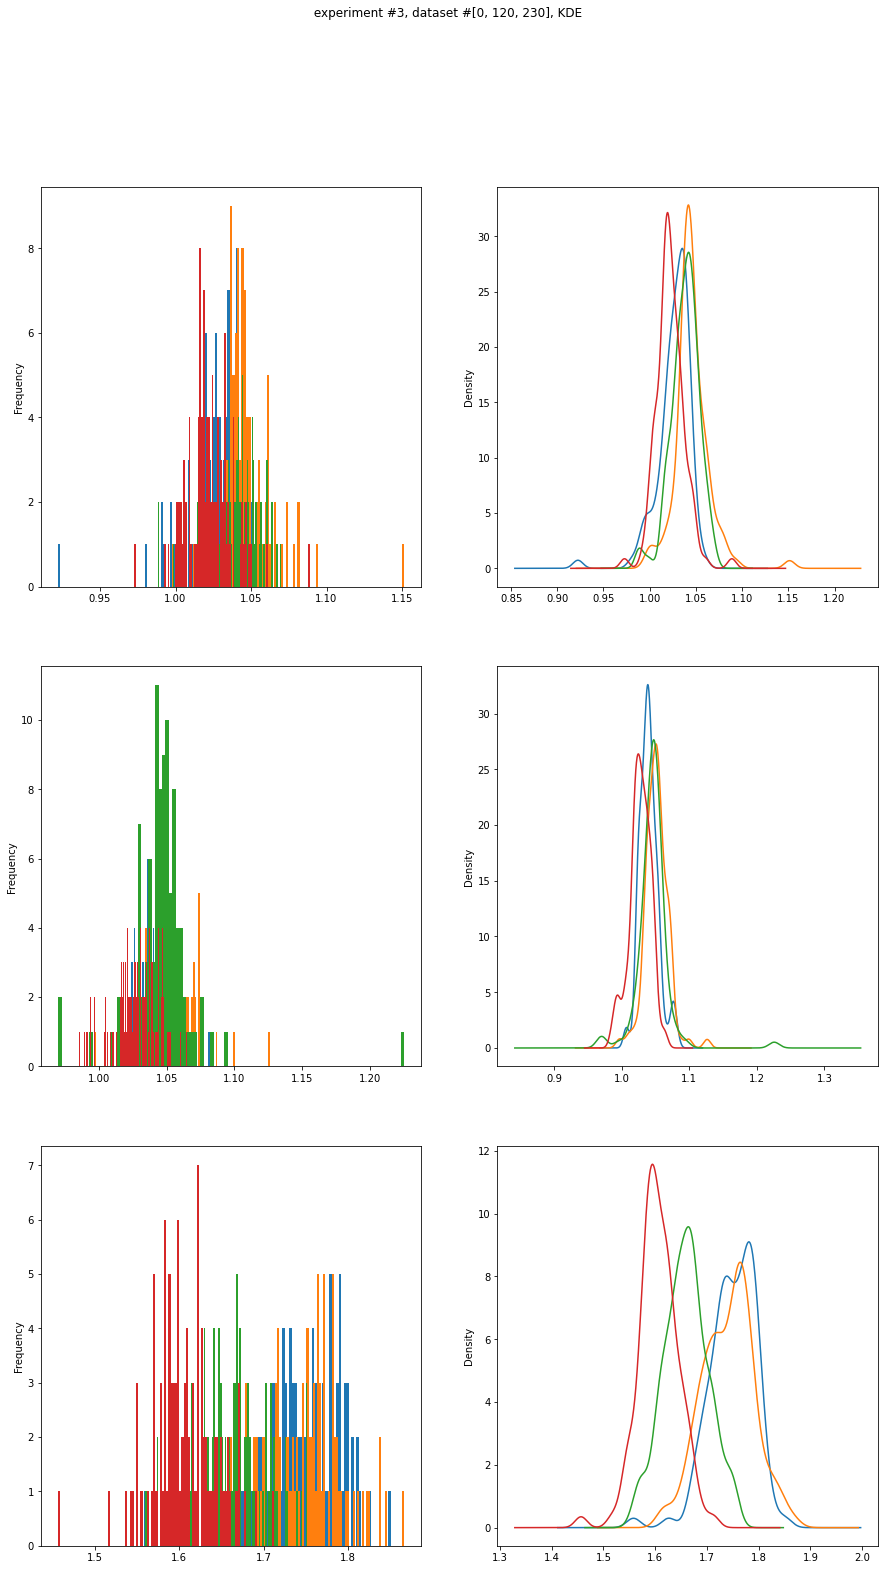

In [14]:
data_n = [0, 120, 230]
max_shape = 4 # number of experiments that are going to be plotted
plot_kde_hist(data_n, max_shape, sorted_forcast_list1)

## std of mean and std over time

In [15]:
## calculate the std over different repetitions
forecast_distrib_df1 = get_forcast_distrib(forcast_list1)
# convert the list of dataframes to a 3d np
forecast_np = get_np_forcast(forecast_distrib_df1)
# get std over different experiments
forecast_std_np = get_std_np(forecast_np, forecast_distrib_df1)
df_std_forecast = pd.DataFrame(forecast_std_np)
df_std_forecast.rename(index={0:'mean',1:'sigma'}, inplace=True)

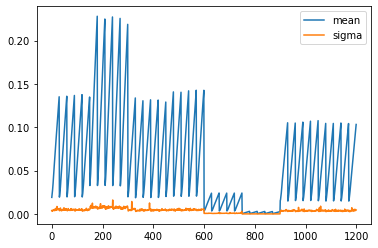

In [16]:
df_std_forecast.T.plot()

## plot samples of experimets

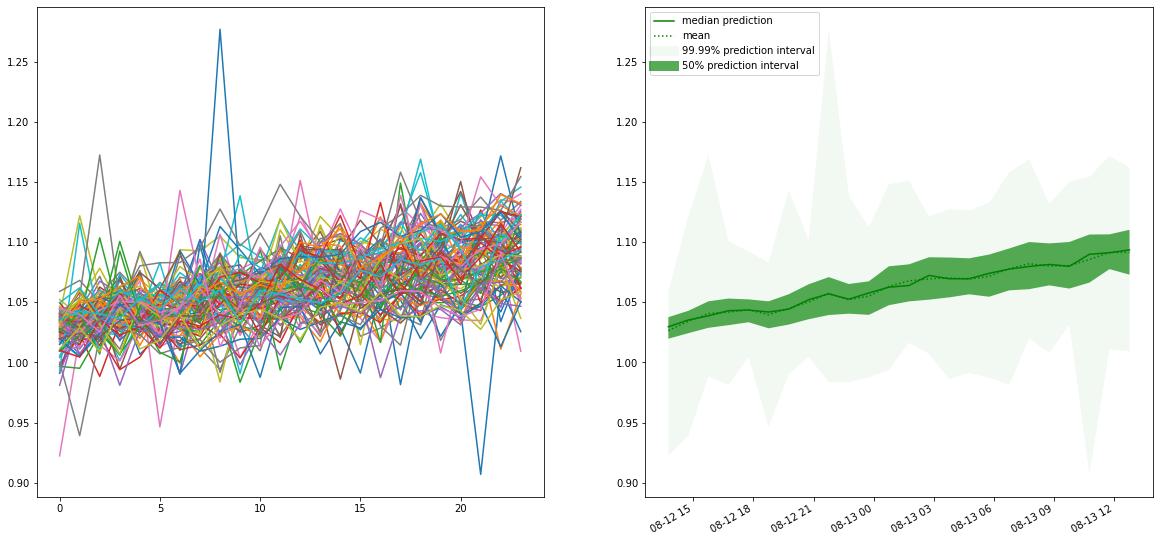

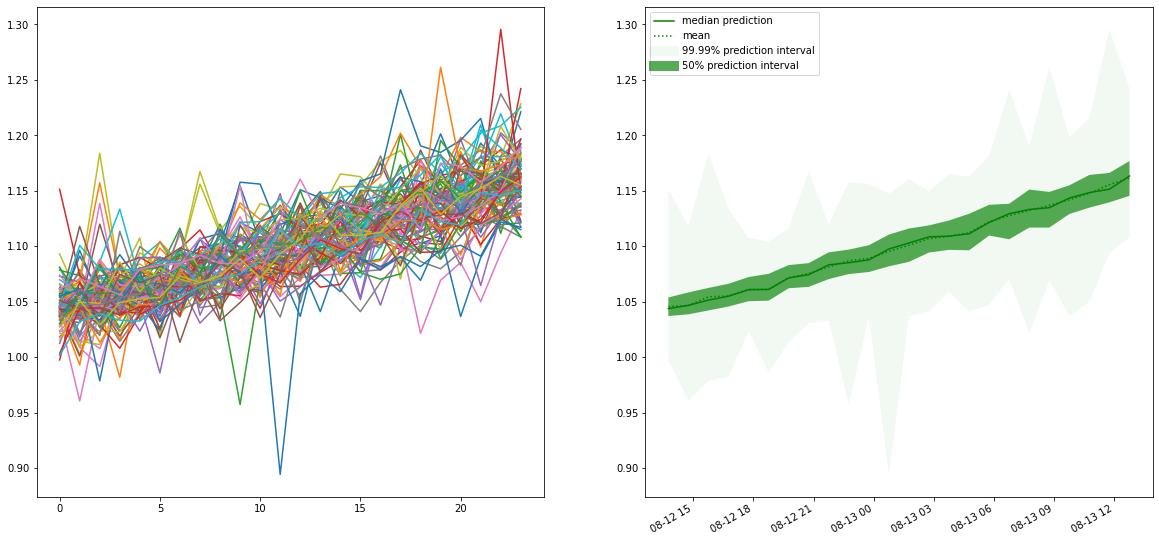

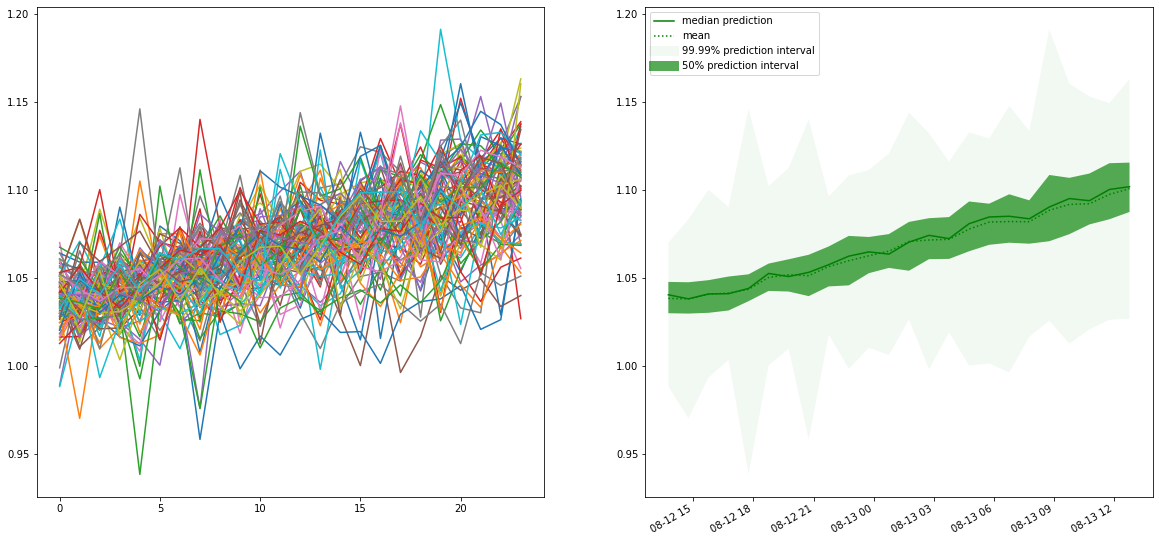

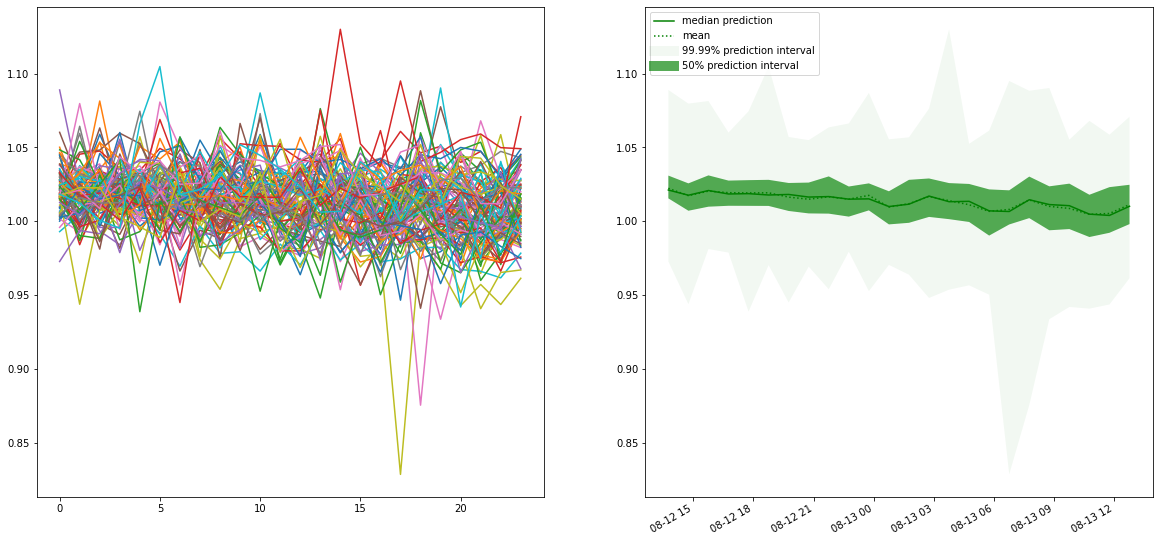

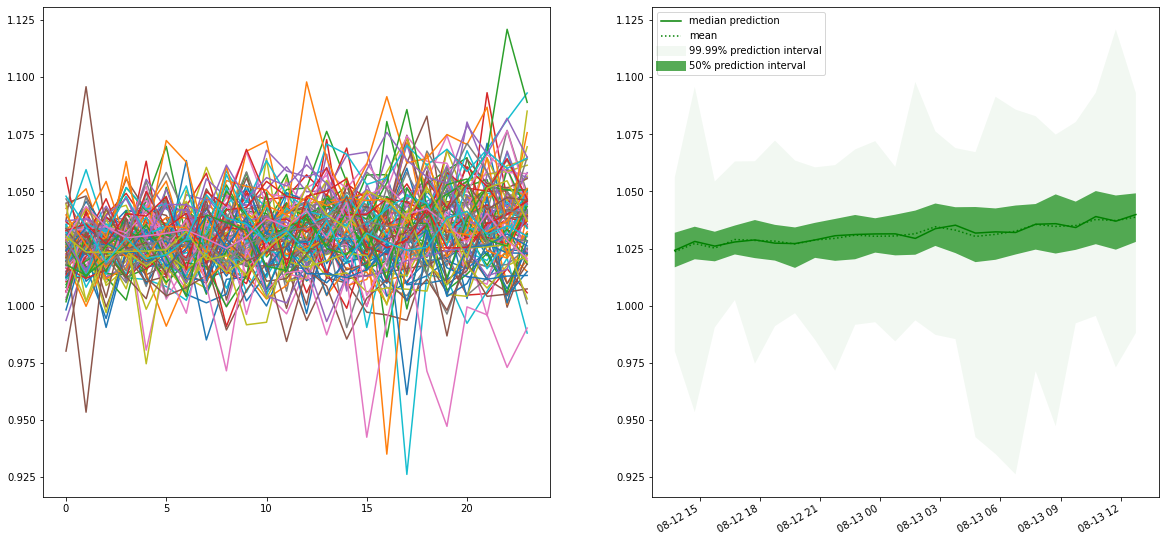

In [18]:
time_point_no = 0
rep_lim = 5
save_plot_exp(sample_forcast_list1, rep_lim, time_point_no)

## KS Test

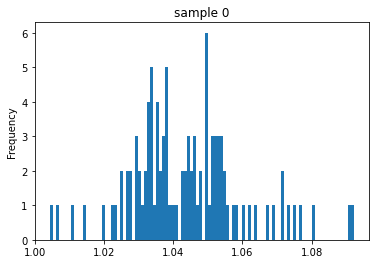

In [20]:
# plot the samples
plt.title('sample 0')
sample0.plot.hist(bins = 100)
# plt.xlim([-40,70])

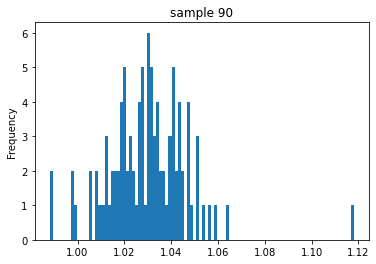

In [21]:
plt.title('sample 90')
sample90.plot.hist(bins = 100)
# plt.xlim([-40,70])

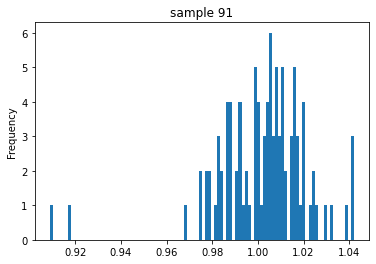

In [22]:
plt.title('sample 91')
sample91.plot.hist(bins = 100)
# plt.xlim([-40,70])

In [23]:
# calculate the table of ks tests for each time points
data_point = 4
ks_table = get_ks_tmp(sample_forcast_list1, data_point)

In [24]:
ks_table

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,True,False,True,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,True,False,False,False,True,False,False,True,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,True,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,True,True
4,False,False,False,False,True,False,False,True,False,False,...,True,False,True,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,False,False,False
96,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
97,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
98,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [25]:
# calculate the proportion of true/all for upper triangle of the table
portion_ks_table(ks_table)

0.08888888888888889

As it is apparant for tmp=12 the ks test gave us good results. however, for tmp=1000 it is not the case

In [26]:
# now we can loop through all 53000 time points and output the results
# try it for first 1000 points
tmp_lim = 100

portion_array = np.zeros(tmp_lim)

for data_point in range(tmp_lim):
    ks_table = get_ks_tmp(sample_forcast_list1, data_point)  
    portion_array[data_point]= portion_ks_table(ks_table)
    print(data_point)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


(0.0, 24.0)

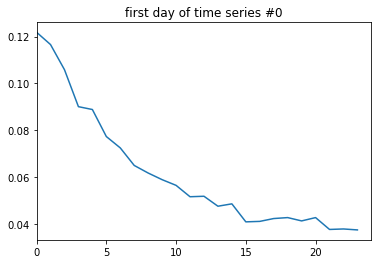

In [28]:
i = 0
plt.plot(portion_array[i*168: (i)*168 + 24])
plt.title(f'first day of time series #{i}')
plt.xlim(0,24)

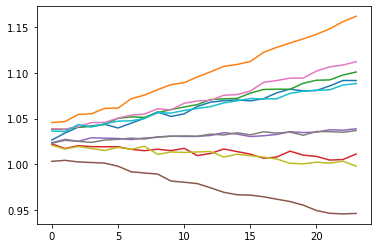

In [33]:
#time series number
i = 0

for j in range(10):
    (sorted_forcast_list1[j]['mean'].iloc[i*168: (i)*168 + 24]).plot()

# plt.plot(portion_array[i*168: (i)*168 + 24])
# plt.xlim(0,24)

Text(0.5, 1.0, 'time series #0')

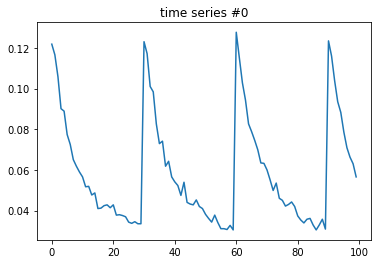

In [30]:
i = 0
plt.plot(portion_array[i*168 : (i+1)*168])
plt.title(f'time series #{i}')

Text(0.5, 1.0, 'all time series')

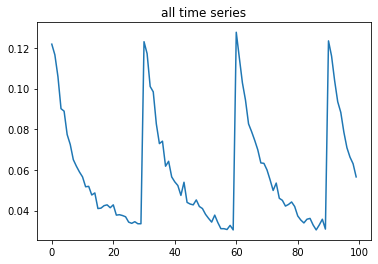

In [31]:
plt.plot(portion_array)
plt.title('all time series')